# Regressão 01 - tarefa 03 - transformações em X e Y

In [ ]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd


In [ ]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.rename(columns={"sex":"gender"}, inplace=True)

In [ ]:
tips["pct_tip"] = (tips['tip'] / (tips['total_bill'] - tips['tip'])).round(2)
tips["net_bill"] = tips["total_bill"] - tips["tip"]

tips.head()

,total_bill,tip,gender,smoker,day,time,size,pct_tip,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17,20.98


Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [ ]:
# Gerando a matriz de design para as 5 primeiras variáveis explicativas:

y, X = patsy.dmatrices("tip ~ gender + smoker + time + net_bill", tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  gender[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1                 1             1               1     15.98
          1                 0             1               1      8.68
          1                 0             1               1     17.51
          1                 0             1               1     20.37
          1                 1             1               1     20.98
  Terms:
    'Intercept' (column 0)
    'gender' (column 1)
    'smoker' (column 2)
    'time' (column 3)
    'net_bill' (column 4)

In [ ]:
# Gerando a matriz de y para as primeiras variáveis respostas:

y

DesignMatrix with shape (5, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  Terms:
    'tip' (column 0)

In [ ]:
# Como forma de mensurar quais são as variáveis significativas e as que
# não são, irei realizar o modelo do statsmodel fórmula:

modelo = smf.ols("tip ~ gender + smoker + time + net_bill", tips).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           2.64e-20
Time:                        22:04:21   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1999      0.242      4.952      0.000       0.723       1.677
gender[T.Female]    -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]         0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]       0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill             0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='tip'>

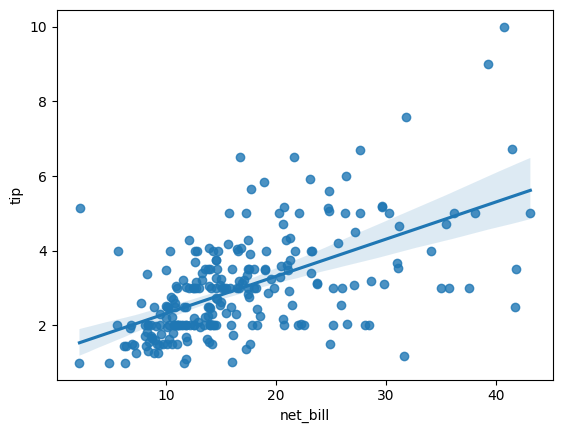

In [ ]:
sns.regplot(x= "net_bill", y = "tip", data=tips)

A partir do valor-p, verifica-se que a única variável com relevância estatística é a net_bill.

In [ ]:
# Criando o modelo com apenas a variável significativa:

modelo = smf.ols("tip ~ net_bill", tips).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           5.02e-23
Time:                        22:04:22   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

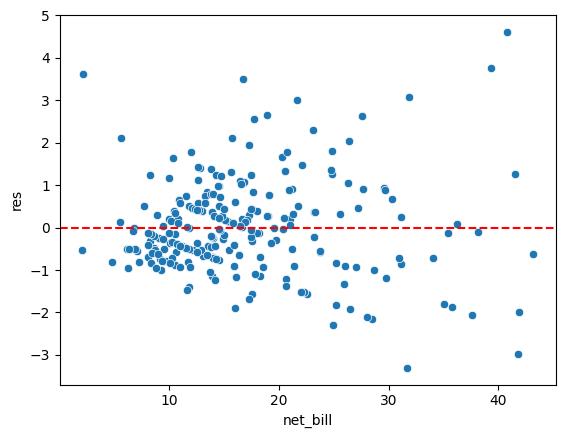

In [ ]:
tips['res'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

# Verificando o gráfico de resíduo em função de net_bill. A partir dele,
# nota-se que o gráfico não está próximo do ideal, visto que percebe-se
# uma tendência ao longo dele em forma de cone.

**- Transformando a variável explicativa:**

In [ ]:
modelo_log = smf.ols("tip ~ np.log(net_bill)", tips).fit()

modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           4.40e-20
Time:                        22:04:22   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelo_pol = smf.ols("tip ~ np.power(net_bill,2)", tips).fit()

modelo_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.47e-20
Time:                        22:04:22   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir das tabelas acima, concebe-se que o melhor modelo é o polinomial, uma vez que apresenta um coeficiente de determinação superior ao modelo contruído por meio do logarítimo.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
# Calculando o R² na escala de tip para o modelo que não concebe
# nenhuma transformação da variável explicativa e ao que apresenta:

tips['tip_modelo'] = modelo.fittedvalues

r = (tips[['tip_modelo', 'tip']].corr().iloc[0,1]**2).round(2)
r

0.33

In [ ]:
tips['tip_pol'] = modelo_pol.fittedvalues

r2 = (tips[['tip_pol', 'tip']].corr().iloc[0,1]**2).round(2)
r2

0.3

A partir do R² encontrado com base em "tip", verifica-se que o modelo que não apresenta nenhuma transformação na variável explicativa apresenta um coeficiente de determinação maior

- Digressão:

Vou analisar os dados como forma de verificar se há muito outliers, que, penso, estar afetando negativamente na construnção do modelo. Para tanto, irei verificá-los por meio do uso do gráfico de boxplot

<Axes: >

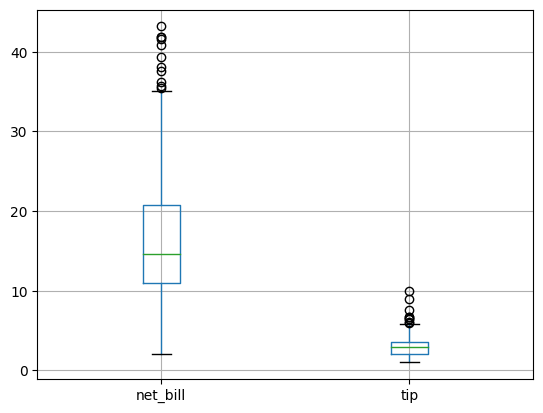

In [ ]:
# Criando o gráfico de boxplot:

# Note que há a presença de muitos outliers, que podem estar afetando
# negativamente o modelo, o que significa que eu irei transformar os
# dados para que seus efeitos negativos sejam reduzidos.

tips[['net_bill', "tip"]].boxplot()

In [ ]:
tips2 = tips[["tip", "net_bill"]]
tips2.head()

,tip,net_bill
0,1.01,15.98
1,1.66,8.68
2,3.50,17.51
3,3.31,20.37
4,3.61,20.98


In [ ]:
# Transformando as variáveis em seus respectivos ranks, para diminuir
# os efeitos negativos dos outiliers:

tips2_rank = pd.concat([tips2, tips2.rank()], axis=1)
tips2_rank.columns = ["net_bill", "tip", "net_bill_rank", "tip_rank"]

tips2_rank

,net_bill,tip,net_bill_rank,tip_rank
0,1.01,15.98,5.0,139.5
1,1.66,8.68,33.0,27.0
2,3.50,17.51,177.0,159.0
3,3.31,20.37,165.0,179.0
4,3.61,20.98,185.0,186.0
...,...,...,...,...
239,5.92,23.11,236.0,198.0
240,2.00,25.18,62.0,209.0
241,2.00,20.67,62.0,183.0
242,1.75,16.07,38.0,141.0


<Axes: >

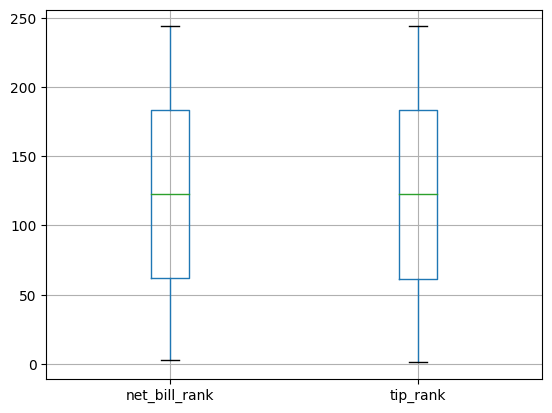

In [ ]:
# Verificando o novo boxplot:

tips2_rank[['net_bill_rank', "tip_rank"]].boxplot()

<Axes: xlabel='net_bill_rank', ylabel='tip_rank'>

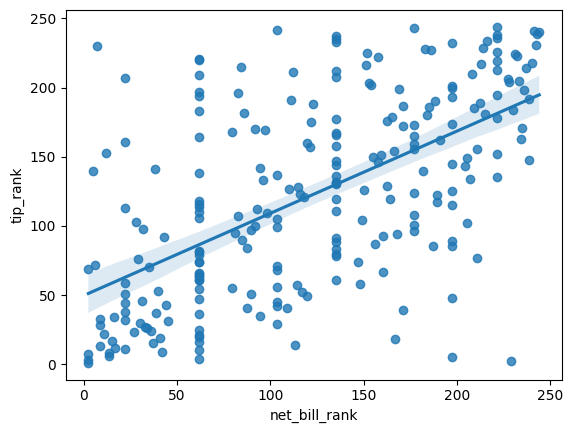

In [ ]:
# Verificando o gráfico de regressão:

sns.regplot(x= "net_bill_rank", y = "tip_rank", data=tips2_rank)

In [ ]:
# Verificando o R² do modelo com os dados novos:

modelo = smf.ols("tip_rank ~ net_bill_rank", tips2_rank).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tip_rank   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     131.7
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.25e-24
Time:                        22:04:23   Log-Likelihood:                -1331.3
No. Observations:                 244   AIC:                             2667.
Df Residuals:                     242   BIC:                             2674.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        49.6389      7.320      6.782      0.000      35.221      64.057
net_bill_rank     0.5948      0.052     11.477      0.000       0.493       0.697
==============================================================================
Omnibus:                        2.584   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.227
Skew:                           0.200   Prob(JB):                        0.328
Kurtosis:                       3.243   Cond. No.                         284.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

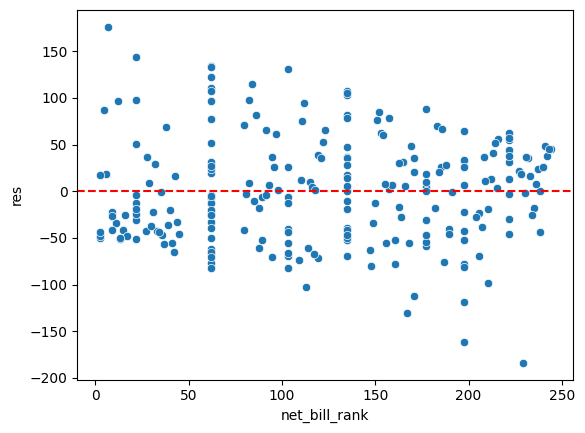

In [ ]:
tips2_rank['res'] = modelo.resid

sns.scatterplot(x = 'net_bill_rank', y = 'res', data = tips2_rank)
plt.axhline(y=0, color='r', linestyle='--')


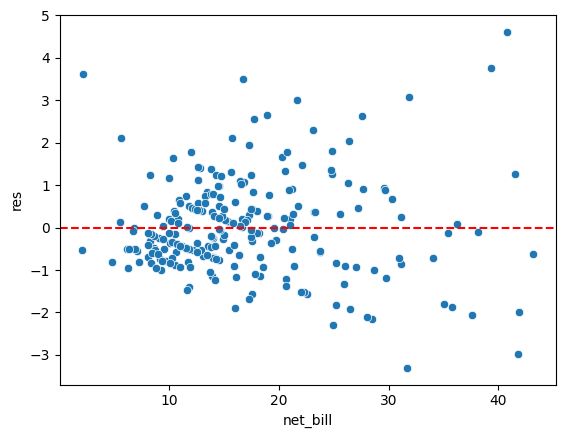

Comparando o modelo antigo com os dados não rankiados, nota-se que houve uma pequena melhora no modelo, tanto demonstrada no coeficiente de determinação, que antes era de 0.33, passando a ser de 0.35, bem como no gráfico de resíduos.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
df = pd.read_csv("/content/previsao_de_renda.csv")
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [ ]:
df.shape

(15000, 15)

In [ ]:
# Verificando a presença de
# dados nulos e/ ou duplicados:

df.isna().sum()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Removendo os dados nulos:

df = df.dropna()

df.shape

(12427, 15)

In [ ]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


<ipython-input-28-9648571bdab2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)


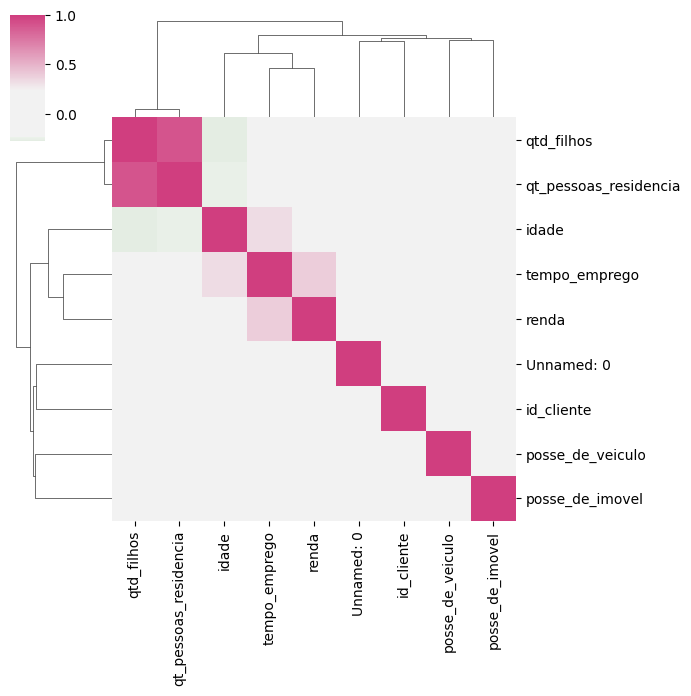

In [ ]:
# Criando a matriz de correção para verificar quais são as
# variáveis que apresentam mais correlação com a renda:

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True,
                             sep=60, center="light")

sns.clustermap(df.corr(), figsize=[7,7], center=0, cmap=cmap)

In [ ]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [ ]:
# Criando o modelo para o dataframe previsão_de_renda. Por meio dele,
# vou verificar o nível de significância estatísticas das variáveis
# explicativas:



modelo1 = smf.ols("renda ~ qtd_filhos + qt_pessoas_residencia + educacao + idade + tempo_emprego",
                 df).fit()

modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     278.0
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:04:25   Log-Likelihood:            -1.2960e+05
No. Observations:               12427   AIC:                         2.592e+05
Df Residuals:                   12418   BIC:                         2.593e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        -572.0082    930.959     -0.614      0.539   -2396.832    1252.816
educacao[T.Pós graduação]         150.6048   1798.386      0.084      0.933   -3374.510    3675.719
educacao[T.Secundário]            155.1926    813.490      0.191      0.849   -1439.374    1749.760
educacao[T.Superior completo]     573.0500    816.088      0.702      0.483   -1026.610    2172.710
educacao[T.Superior incompleto]  -215.7700    879.009     -0.245      0.806   -1938.765    1507.225
qtd_filhos                       -780.1975    218.005     -3.579      0.000   -1207.521    -352.874
qt_pessoas_residencia            1032.0687    181.487      5.687      0.000     676.326    1387.811
idade                              12.1185      8.733      1.388      0.165      -4.999      29.236
tempo_emprego                     508.0879     11.576     43.891      0.000     485.397     530.779
==============================================================================
Omnibus:                    17039.098   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7738042.114
Skew:                           7.723   Prob(JB):                         0.00
Kurtosis:                     124.267   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Criando o modelo para o dataframe previsão_de_renda. Por meio dele,
# vou verificar o nível de significância estatísticas das variáveis
# explicativas:



modelo = smf.ols("np.log(renda) ~ qtd_filhos + qt_pessoas_residencia + educacao + idade + tempo_emprego",
                 df).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     334.2
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:04:25   Log-Likelihood:                -15105.
No. Observations:               12427   AIC:                         3.023e+04
Df Residuals:                   12418   BIC:                         3.029e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.6198      0.093     82.129      0.000       7.438       7.802
educacao[T.Pós graduação]           0.0144      0.179      0.080      0.936      -0.337       0.366
educacao[T.Secundário]             -0.0696      0.081     -0.859      0.390      -0.229       0.089
educacao[T.Superior completo]       0.0215      0.081      0.264      0.792      -0.138       0.181
educacao[T.Superior incompleto]    -0.0952      0.088     -1.086      0.277      -0.267       0.077
qtd_filhos                         -0.0567      0.022     -2.612      0.009      -0.099      -0.014
qt_pessoas_residencia               0.0977      0.018      5.404      0.000       0.062       0.133
idade                               0.0015      0.001      1.667      0.096      -0.000       0.003
tempo_emprego                       0.0553      0.001     47.963      0.000       0.053       0.058
==============================================================================
Omnibus:                       29.507   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.705
Skew:                           0.119   Prob(JB):                     3.55e-07
Kurtosis:                       2.969   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analisando os dois modelos, nota-se que o modelo que apresenta a variável resposta transformada apresenta o coeficiente de determinação maior, então ele será mantido. Além disso, analisando a tabela dos modelos, verificou-se que as variáveis que apresentam maior nível de significância estatística ao modelo foram: tempo de emprego, idade, quantidade de filhos e de pessoas na residência. Então apenas esses serão selecionados e, depois, selecionarei apenas idade e tempo de emprego e, por fim, apenas tempo de emprego, para verificar qual melhor modelo, em termos de R², explica melhor a renda.  

In [ ]:
modelo = smf.ols("np.log(renda) ~ qtd_filhos + qt_pessoas_residencia + idade + tempo_emprego",
                 df).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     657.0
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:04:25   Log-Likelihood:                -15124.
No. Observations:               12427   AIC:                         3.026e+04
Df Residuals:                   12422   BIC:                         3.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.6019      0.048    159.213      0.000       7.508       7.696
qtd_filhos               -0.0532      0.022     -2.447      0.014      -0.096      -0.011
qt_pessoas_residencia     0.0951      0.018      5.253      0.000       0.060       0.131
idade                     0.0011      0.001      1.286      0.198      -0.001       0.003
tempo_emprego             0.0554      0.001     48.004      0.000       0.053       0.058
==============================================================================
Omnibus:                       29.552   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.751
Skew:                           0.119   Prob(JB):                     3.46e-07
Kurtosis:                       2.974   Cond. No.                         295.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelo = smf.ols("np.log(renda) ~ idade + tempo_emprego",
                 df).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     1282.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:04:26   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.031e+04
Df Residuals:                   12424   BIC:                         3.033e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8412      0.033    239.727      0.000       7.777       7.905
idade         -7.584e-05      0.001     -0.092      0.927      -0.002       0.002
tempo_emprego     0.0555      0.001     47.978      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.496   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.748
Skew:                           0.127   Prob(JB):                     4.69e-08
Kurtosis:                       2.969   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelo = smf.ols("np.log(renda) ~ tempo_emprego",
                 df).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:04:26   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A partir dos modelos gerados, com base no R², compreende-se que o melhor modelo utilizado ainda o primeiro, ainda que ele possua um coeficiente de determinação baixo.

Analisando o gráfico de resíduo:

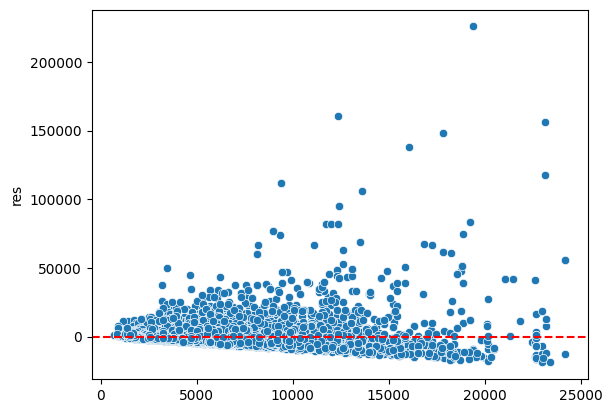

In [ ]:
df['res'] = modelo1.resid

sns.scatterplot(x = modelo1.fittedvalues, y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')


Analisando o gráfico de resíduos, compreende-se que ele não está necessariamente na forma ideal, o que ajuda a entender melhor o baixo R².